In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pickle as pkl

In [3]:
from tqdm.auto import tqdm

In [4]:
path = "/home/unix/sjohri/valab_sjohri/projects/methods/testing_parameters/melanoma-tirosh/results=251-vision-C2-CP-KEGG/"
de_summary_all= []
for i in tqdm(range(0,16)):
    de_summary_all.append(pd.read_csv(path+str(i)+"/de_summary_all.csv", index_col=0))

In [5]:
y1 = []
y2 = []
for i in range(len(de_summary_all)):
    y1.append(de_summary_all[i][(de_summary_all[i].nonrobust==False) & (de_summary_all[i].p<=0.05)].shape[0])
    y2.append(de_summary_all[i][(de_summary_all[i].nonrobust==True) & (de_summary_all[i].p<=0.05)].shape[0])

In [6]:
path = "/home/unix/sjohri/valab_sjohri/projects/methods/testing_parameters/melanoma-tirosh/results=251-vision-C2-CP-KEGG/"
de_obj_all= []
for i in tqdm(range(0,16)):
    pickle_file = open(path+str(i)+"/de_obj_all.pickle", "rb")
    de_obj_all.append(pkl.load(pickle_file))

In [7]:
conf_list = []
for i in tqdm(range(len(de_obj_all))):
    temp_list = []
    temp_obj = de_obj_all[i]
    temp_list.extend([(temp_obj.folds[j].p<0.05).sum() for j in range(len(temp_obj.folds))])
    conf_list.append(temp_list)

In [8]:
flat_list = []
for i in range(len(conf_list)):
    flat_list.append([item for sublist in conf_list[i] for item in sublist])

In [9]:
df = pd.DataFrame(flat_list)
df

,0,1,2,3,4,5,6,7,8,9,...,5763,5764,5765,5766,5767,5768,5769,5770,5771,5772
0,95,71,86,82,73,91,74,62,74,86,...,71,79,87,72,80,68,78,100,73,60
1,99,92,106,79,99,89,96,91,95,97,...,108,105,109,105,108,92,95,101,93,107
2,113,109,104,103,118,112,101,92,114,104,...,105,105,90,96,101,104,111,100,104,111
3,117,120,108,117,119,111,112,131,106,104,...,106,120,101,112,107,117,111,113,109,106
4,127,122,115,120,118,126,123,121,123,125,...,112,114,117,121,122,118,122,119,126,106
5,131,118,123,125,125,134,120,130,123,121,...,126,120,125,119,124,124,121,121,123,121
6,132,121,122,125,125,131,131,122,128,126,...,120,129,129,122,121,129,129,125,124,119
7,137,125,126,131,126,136,134,135,128,129,...,130,127,126,130,125,127,123,131,127,126
8,137,132,126,126,132,138,130,136,129,131,...,126,126,132,131,132,133,128,133,129,130
9,138,144,133,127,137,132,138,132,127,135,...,130,130,133,129,133,134,131,127,135,132


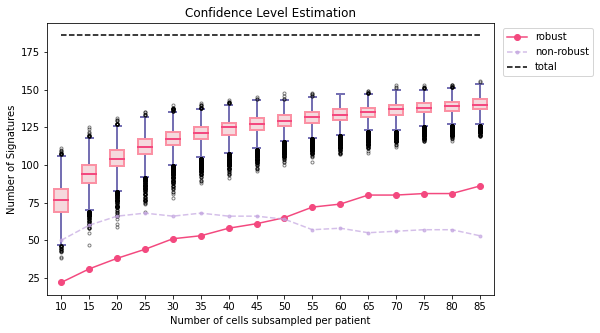

In [13]:
fig, axs = plt.subplots(figsize=(len(conf_list)/2,5))

bp = axs.boxplot(df,labels=[10+5*i for i in range(0,16)],patch_artist=True);
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color='#FB91A4', linewidth=2)
    # change fill color
    box.set(facecolor = '#F5D9DD')

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570B3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570B3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#F3497F', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='#E7298A', alpha=0.5)

    
axs.plot(range(1,17),y1, label="robust", color="#F3497F", marker="o")
axs.plot(range(1,17),y2, label="non-robust", color="#C3A5E0", marker=".", linestyle='dashed', alpha=0.7)
# axs.plot(range(1,17),np.array(y1)+np.array(y2), label="paper", color="#7570B3", marker=".")
axs.plot([1,16],
         [de_summary_all[0].shape[0],
          de_summary_all[0].shape[0]],color="#000000", linestyle='dashed', label="total")
axs.legend(bbox_to_anchor=(1.01, 1), loc='upper left');
axs.set_xlabel("Number of cells subsampled per patient")
axs.set_ylabel("Number of Signatures")
axs.set_title("Confidence Level Estimation");
